In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import glob
from skimage.io import imread, imshow
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
train_path = r'C:\Users\agraw\Downloads\archive (1)\For use\TRAIN'
test_path = r'C:\Users\agraw\Downloads\archive (1)\For use\TEST'
val_path = r'C:\Users\agraw\Downloads\archive (1)\For use\VAL'
image_size = [512,512,3]

In [3]:

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [4]:

training_set = train_datagen.flow_from_directory(train_path,target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2341 images belonging to 2 classes.


In [53]:
test_set = test_datagen.flow_from_directory(test_path,target_size = (512,512),shuffle= False,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 2 classes.


In [6]:
val_set = train_datagen.flow_from_directory(val_path,target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 240 images belonging to 2 classes.


In [7]:
mobile = tf.keras.applications.MobileNetV2(
    input_shape= image_size,
    include_top=False,
    weights="imagenet",
)

mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 513, 513, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 256, 256, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 256, 256, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [8]:
for layer in mobile.layers:
    layer.trainable = False

In [10]:

x = (Flatten()(mobile.output))

prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=mobile.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 513, 513, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 256, 256, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 256, 256, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

block_10_expand_relu (ReLU)     (None, 32, 32, 384)  0           block_10_expand_BN[0][0]         
__________________________________________________________________________________________________
block_10_depthwise (DepthwiseCo (None, 32, 32, 384)  3456        block_10_expand_relu[0][0]       
__________________________________________________________________________________________________
block_10_depthwise_BN (BatchNor (None, 32, 32, 384)  1536        block_10_depthwise[0][0]         
__________________________________________________________________________________________________
block_10_depthwise_relu (ReLU)  (None, 32, 32, 384)  0           block_10_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_10_project (Conv2D)       (None, 32, 32, 96)   36864       block_10_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_10_p

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
r = model.fit(
  training_set,
  validation_data= val_set,
  epochs=5
  
)

Epoch 1/5
74/74 [==============================] - 178s 2s/step - loss: 10.0731 - accuracy: 0.8586 - val_loss: 0.7942 - val_accuracy: 0.9708
Epoch 2/5
74/74 [==============================] - 176s 2s/step - loss: 1.4565 - accuracy: 0.9445 - val_loss: 1.1258 - val_accuracy: 0.9500
Epoch 3/5
74/74 [==============================] - 174s 2s/step - loss: 0.4737 - accuracy: 0.9714 - val_loss: 0.4791 - val_accuracy: 0.9833
Epoch 4/5
74/74 [==============================] - 174s 2s/step - loss: 0.2532 - accuracy: 0.9859 - val_loss: 0.8542 - val_accuracy: 0.9625
Epoch 5/5
74/74 [==============================] - 172s 2s/step - loss: 0.2367 - accuracy: 0.9816 - val_loss: 0.8144 - val_accuracy: 0.9750


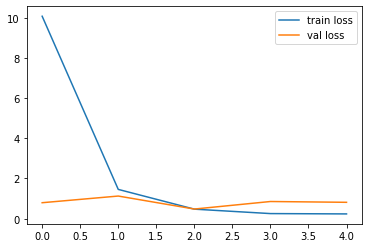

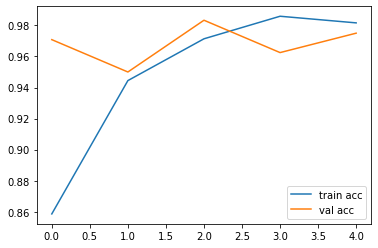

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [54]:
model.evaluate(test_set)

19/19 [==============================] - 40s 2s/step - loss: 2.1750 - accuracy: 0.9183


[2.175032138824463, 0.9183333516120911]

In [55]:
#Confution Matrix and Classification Report
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))


#print('Classification Report')
#target_names = ['Pneumonia','Non-Pneumonia']
#print(classification_report(test_set.classes, y_pred, target_names=target_names))////


Confusion Matrix
[[276  24]
 [ 25 275]]


In [56]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = list(training_set.class_indices.keys())

print(classification_report(test_set.classes, y_pred, target_names=target_names))



Classification Report
              precision    recall  f1-score   support

      NORMAL       0.92      0.92      0.92       300
   PNEUMONIA       0.92      0.92      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

